In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from functools import reduce # for merging dataframes
import re
import os

In [3]:
df = pd.read_csv("output_1.csv")

In [4]:
df.head()

,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,Thickness profile,...,M_Al,B,N,Ti,Cr,V,Mo,Constriction_width,analyse_value,is_constriction
0,283801,NaN,KN4,11395,119,1546.216667,NaN,NaN,4.23050,NaN,...,363,1,41,14,153,0,2,0,1,0
1,283802,NaN,KN4,11446,119,1544.633333,NaN,NaN,4.38275,NaN,...,317,1,34,11,166,0,3,0,1,0
2,283803,NaN,KN3,11304,118,1554.183333,NaN,NaN,3.58925,NaN,...,329,1,28,23,258,0,22,0,1,0
3,283804,NaN,KN2,10785,113,1528.283333,NaN,NaN,4.36900,NaN,...,392,1,57,16,243,0,31,0,1,0
4,283805,NaN,KN2,10836,113,1512.616667,NaN,NaN,5.02125,NaN,...,356,1,45,11,296,0,26,5,1,0


In [5]:
# list of unique with 'no' constriction
df[df.is_constriction == 0 ].analyse.unique()

array(['KN4', 'KN3', 'KN2', 'KT7', 'LK4', 'KT3', 'KM5', 'KR5', 'KN5',
       'L50', 'L65', 'KM4', 'KM8', 'LK2', 'LK6', 'KM3', 'LT7', 'LT4',
       'L51', 'L62', 'LM4', 'K37', 'K21', 'K13', 'K82', 'K35', 'KT2',
       'KN7', 'K20', 'K32', 'T27', 'T21', 'K11', 'TB5', 'K17', 'K58',
       'KB3', 'T23', 'TB0', 'TB6', 'K45', 'K99', 'NB0', 'KT1', 'KK0',
       'KK8', 'K44', 'L85', 'LK5', 'KM7', 'KK1', 'K10', 'K46', 'L47',
       'KM2', 'L76', 'K39', 'LM5', 'KT9', 'KM9', 'KT6', 'T25', 'K27',
       'N71', 'L97', 'K14', 'K15', 'KK5', 'L63', 'L78', 'L74', 'KK7',
       'LK9', 'T26', 'T22', 'K71', 'K40', 'L67', 'K57', 'L71', 'L95',
       'TB4', 'K38'], dtype=object)

In [6]:
# list of unique with 'yes' constriction
df[df.is_constriction == 1 ].analyse.unique()

array(['LT7', 'K37', 'K20', 'T23', 'T21', 'K21', 'K32', 'K13', 'KT1',
       'NB0', 'K35', 'K45', 'LT4', 'K17', 'K58', 'L62', 'KN2', 'KM4',
       'K82', 'KB3', 'LK6', 'KM8', 'K10', 'K27', 'LK2', 'KK5', 'LK1',
       'L97', 'K44', 'LK4', 'L63', 'L78', 'KT3', 'K39', 'KT7', 'LM4',
       'T26', 'L74', 'TB5', 'NB9', 'K11', 'TB6', 'K40', 'T27', 'KN7',
       'KN4', 'L71', 'K57', 'T22', 'L65', 'KN3', 'KT2', 'KM5'],
      dtype=object)

In [7]:
# list of unique along with value count for 'yes' constriction
df[df.is_constriction == 1 ].analyse.value_counts()

K37    118
K21     84
K20     61
T21     47
K32     44
K35     43
LT7     30
K82     30
LK6     24
NB0     24
KT1     23
LT4     20
TB5     14
K13     14
KB3     13
T23     12
L63     10
L97      9
K10      8
L71      8
KN2      7
T27      6
LK2      6
K45      5
KM8      4
L62      4
KT3      4
L78      4
KT2      4
K44      4
K27      4
LK4      3
KK5      3
KN4      3
T26      3
L65      2
KN3      2
KN7      2
K11      2
LK1      2
L74      2
K39      2
KM4      2
K58      2
NB9      1
TB6      1
K40      1
LM4      1
KT7      1
K57      1
T22      1
K17      1
KM5      1
Name: analyse, dtype: int64

<AxesSubplot: >

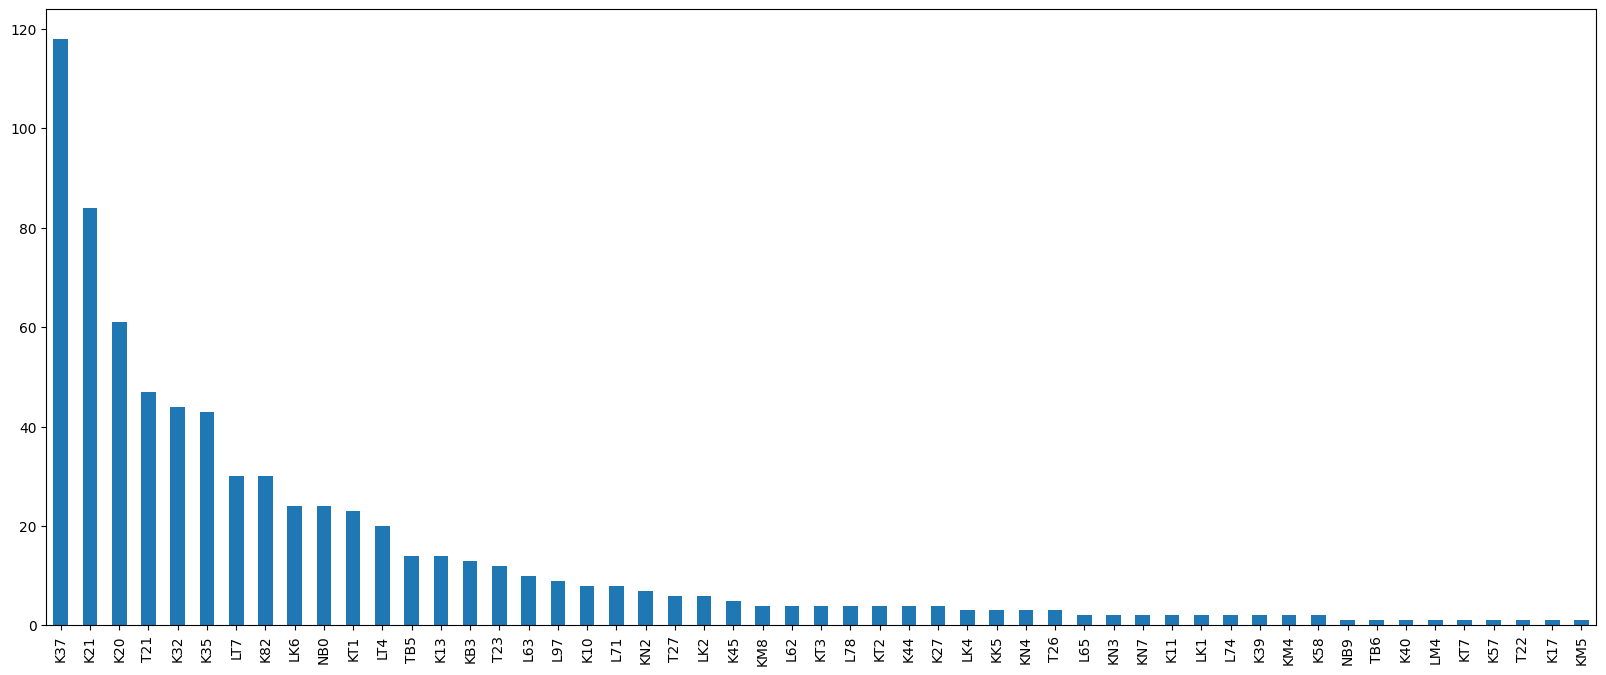

In [8]:
# plot for unique along with value count for 'yes' constriction
plt.figure(figsize=(20,8))
df[df.is_constriction == 1 ].analyse.value_counts().plot(kind='bar')

In [9]:
# all unique vales in our data 
uniqueValues = df.nunique()
uniqueValues

coil                                 10000
furnace Number                           0
analyse                                 85
Hardness_1                            2132
Hardness_2                              67
Width                                 8533
Temperature before finishing mill        0
Temperature after finishing mill         0
Thickness                             6581
Thickness profile                        0
C                                      790
Mn                                    2226
Si                                     623
Nb                                     373
P                                      366
S                                      210
Al                                     524
M_Al                                   522
B                                       22
N                                       71
Ti                                     462
Cr                                     576
V                                       57
Mo         

In [10]:
# Preprocess DataFrame for further analysis 
stats_df = df.drop(['coil','analyse','furnace Number', 'Temperature before finishing mill',
       'Temperature after finishing mill','Thickness profile','Constriction_width','analyse_value'], axis=1)
stats_df.head()

,Hardness_1,Hardness_2,Width,Thickness,C,Mn,Si,Nb,P,S,Al,M_Al,B,N,Ti,Cr,V,Mo,is_constriction
0,11395,119,1546.216667,4.23050,632,3322,124,263,142,60,381,363,1,41,14,153,0,2,0
1,11446,119,1544.633333,4.38275,627,3484,114,260,154,48,329,317,1,34,11,166,0,3,0
2,11304,118,1554.183333,3.58925,625,2334,205,202,183,47,345,329,1,28,23,258,0,22,0
3,10785,113,1528.283333,4.36900,386,2317,149,130,177,99,401,392,1,57,16,243,0,31,0
4,10836,113,1512.616667,5.02125,398,2301,107,114,196,116,376,356,1,45,11,296,0,26,0


In [11]:
# null values
stats_df.isnull().sum()

Hardness_1         0
Hardness_2         0
Width              0
Thickness          0
C                  0
Mn                 0
Si                 0
Nb                 0
P                  0
S                  0
Al                 0
M_Al               0
B                  0
N                  0
Ti                 0
Cr                 0
V                  0
Mo                 0
is_constriction    0
dtype: int64

<AxesSubplot: >

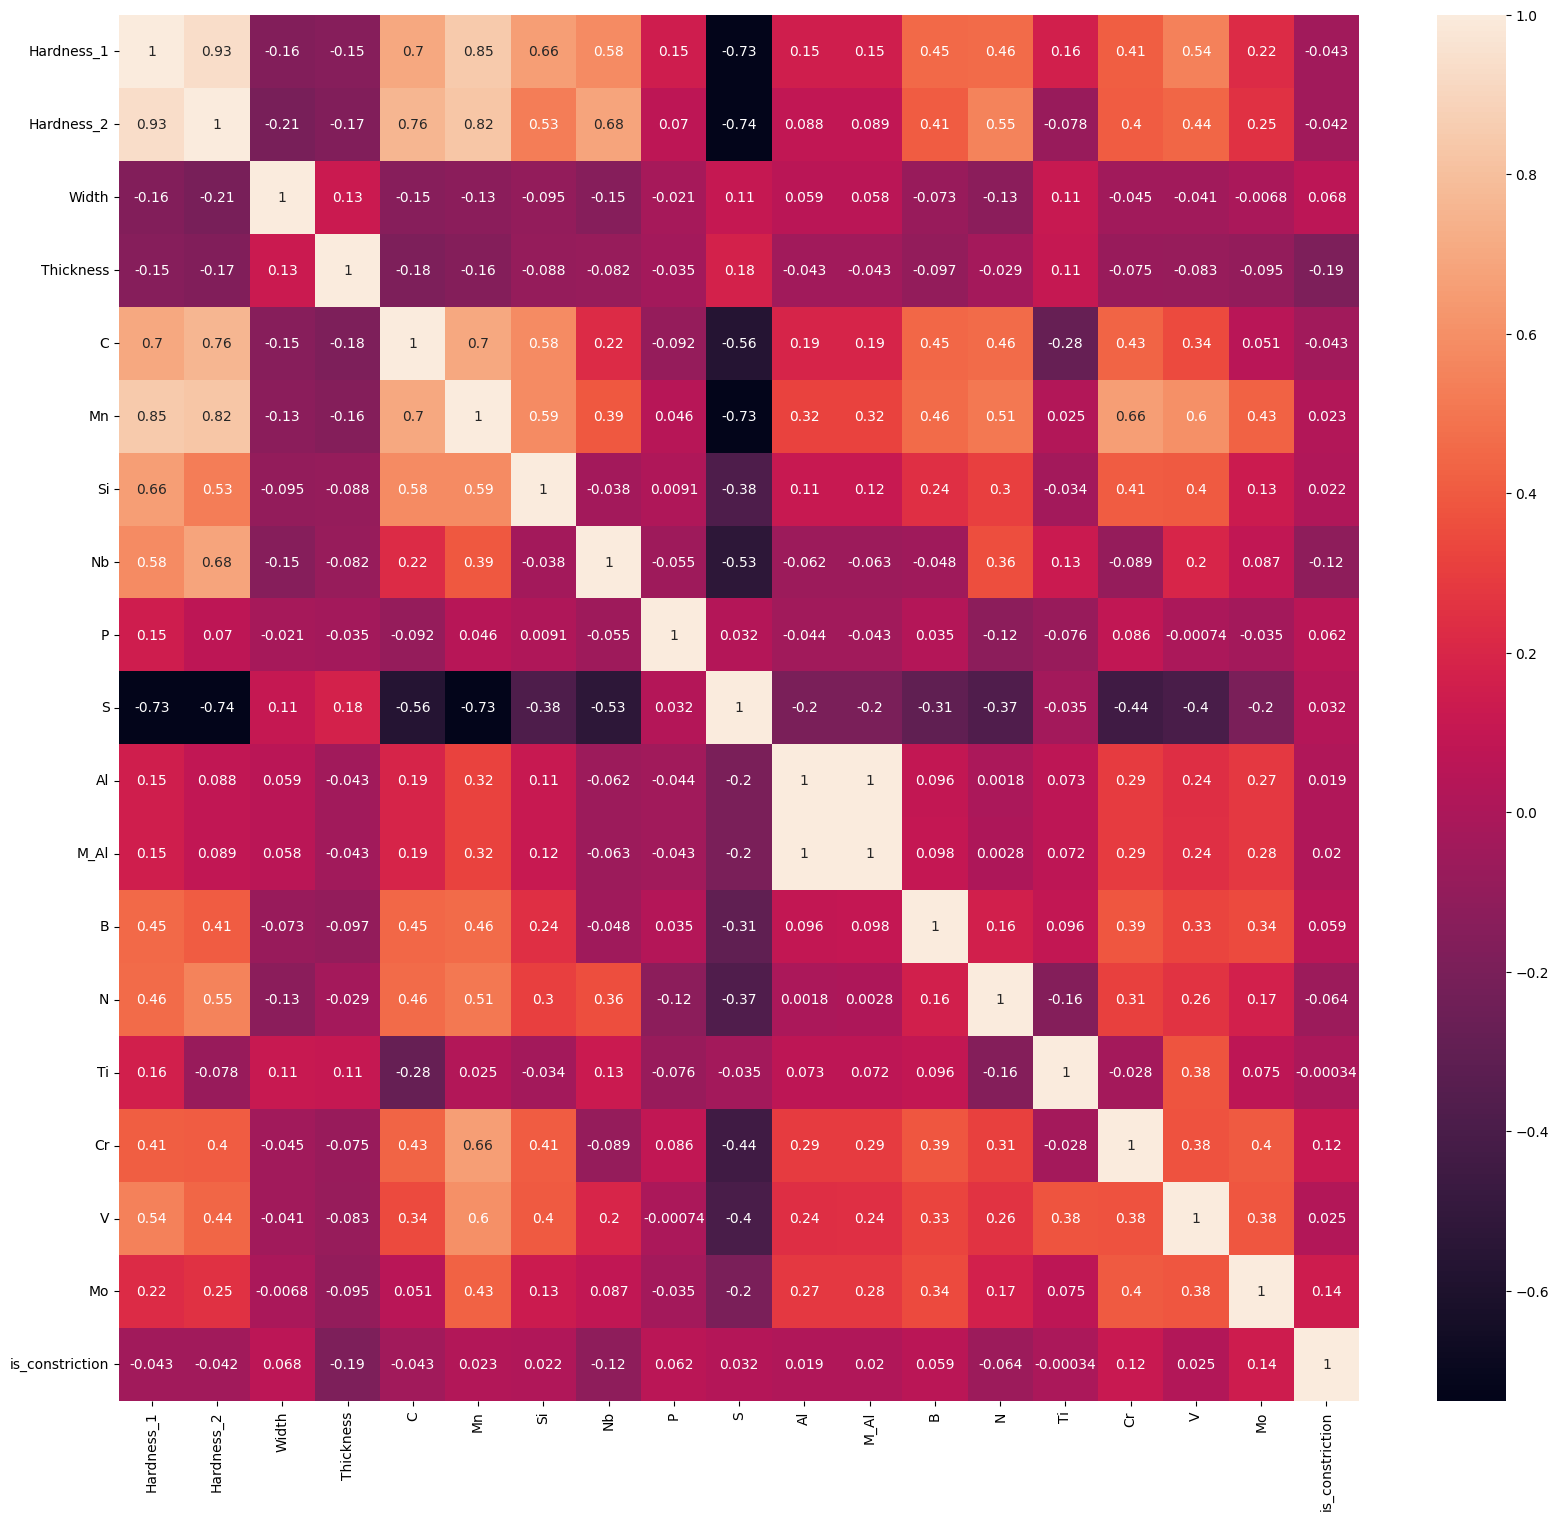

In [12]:
# to check corelation
stats_df_corr = stats_df.corr()
fig, ax = plt.subplots(figsize=(20, 18))

sns.heatmap(stats_df_corr, annot=True)

<AxesSubplot: xlabel='variable', ylabel='value'>

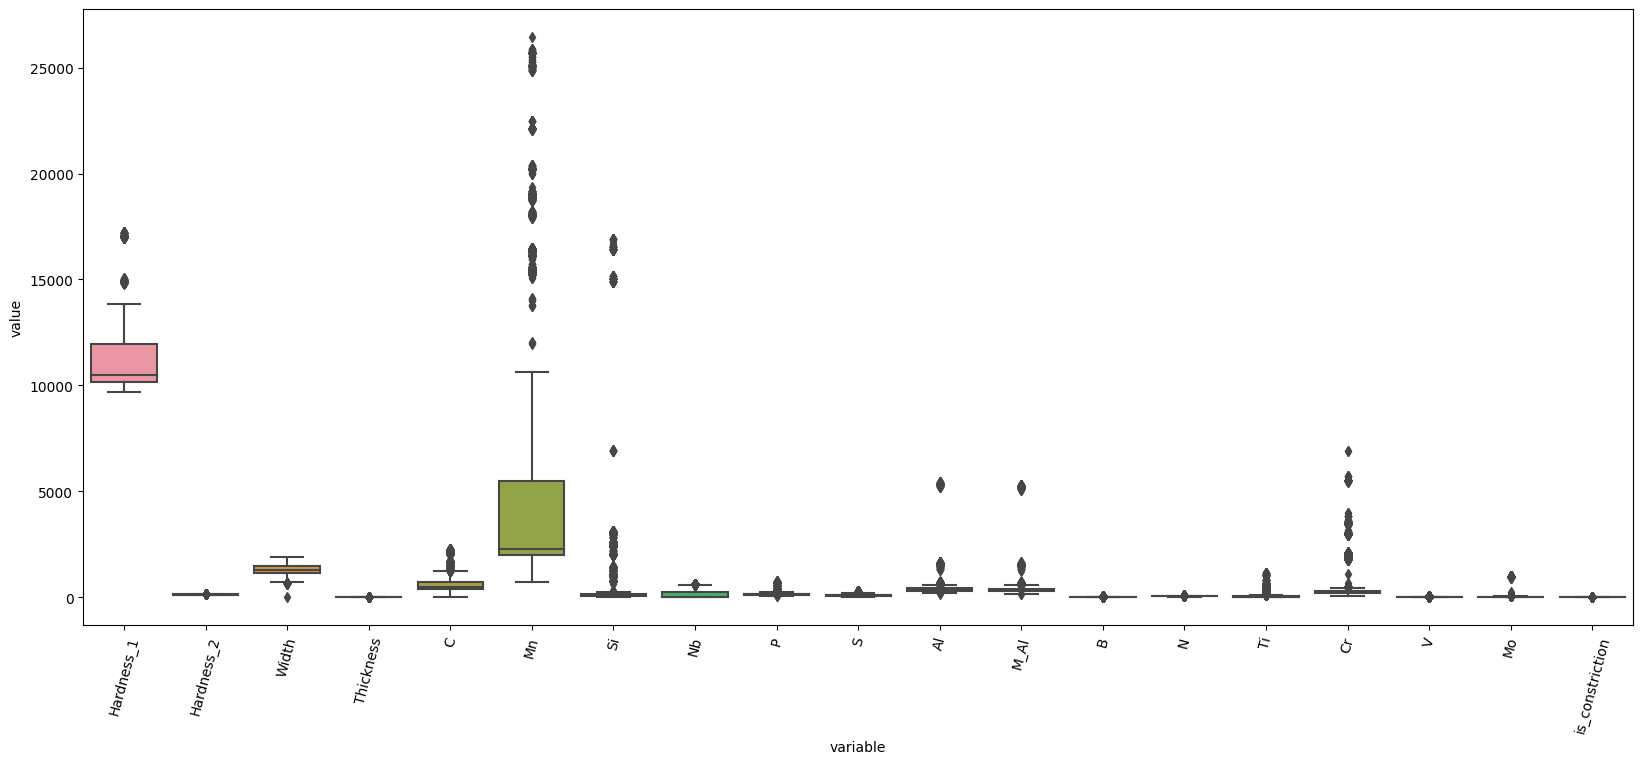

In [13]:
# to plot outliers in our data set
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.figure(figsize=(20,8))
plt.xticks(rotation=75)
sns.boxplot(x="variable", y="value", data=pd.melt(stats_df))

In [14]:
#normalized_df2 = pd.DataFrame(normalize,(df,norm=L2"L2",columns=df.columns))

In [15]:
# Normaliz data set
normalized_df=(stats_df-stats_df.mean())/stats_df.std()

<AxesSubplot: xlabel='variable', ylabel='value'>

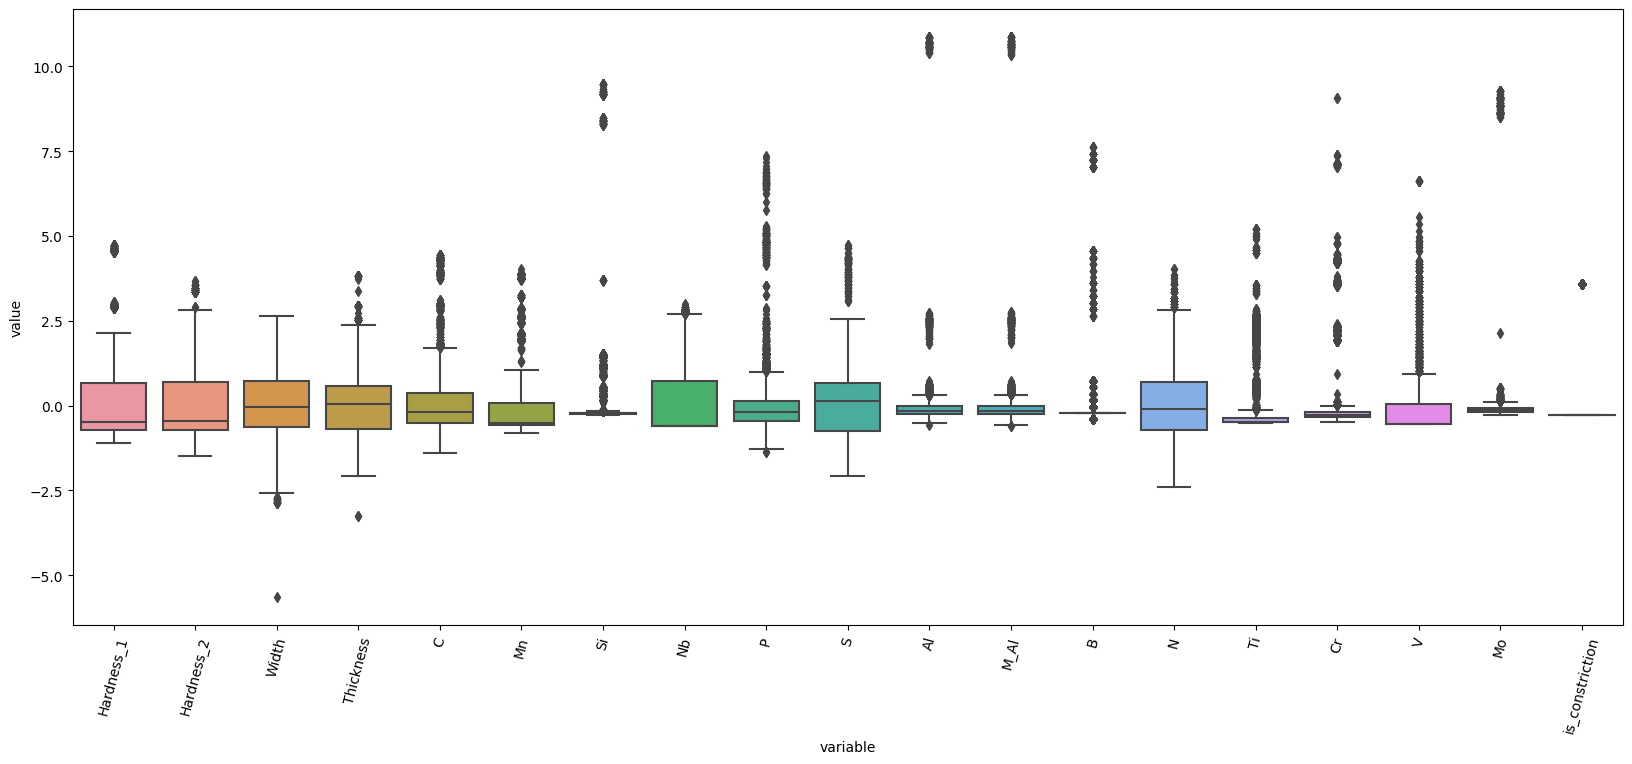

In [16]:
# To plot outliers in our normaliz data set
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.figure(figsize=(20,8))
plt.xticks(rotation=75)
sns.boxplot(x="variable", y="value", data=pd.melt(normalized_df))

In [17]:
# stats about normalize data
normalized_df.describe()

,Hardness_1,Hardness_2,Width,Thickness,C,Mn,Si,Nb,P,S,Al,M_Al,B,N,Ti,Cr,V,Mo,is_constriction
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-5.641709e-16,-2.529532e-16,1.286082e-16,-3.893774e-16,-5.684342e-18,1.847411e-17,3.410605e-17,-6.394885e-17,8.100187e-17,9.379164e-17,-1.136868e-17,2.273737e-17,3.410605e-17,1.193712e-16,1.136868e-17,-8.526513e-18,6.821210e-17,-2.273737e-17,-2.131628e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.105315e+00,-1.485749e+00,-5.642687e+00,-3.251019e+00,-1.405473e+00,-8.037401e-01,-2.714182e-01,-6.122502e-01,-1.379650e+00,-2.072093e+00,-5.802731e-01,-6.007417e-01,-4.082059e-01,-2.408879e+00,-5.215020e-01,-4.804863e-01,-5.371989e-01,-2.884345e-01,-2.799854e-01
25%,-7.233318e-01,-7.124649e-01,-6.394719e-01,-6.862072e-01,-5.098472e-01,-5.720328e-01,-2.443435e-01,-6.122502e-01,-4.538749e-01,-7.370902e-01,-2.351603e-01,-2.354929e-01,-2.173663e-01,-7.302668e-01,-4.967311e-01,-3.267752e-01,-5.371989e-01,-1.736876e-01,-2.799854e-01
50%,-4.758930e-01,-4.547037e-01,-5.043835e-02,4.841898e-02,-1.818623e-01,-5.189293e-01,-2.313822e-01,-6.122502e-01,-1.858872e-01,1.294906e-01,-1.548510e-01,-1.558023e-01,-2.173663e-01,-1.118309e-01,-4.868227e-01,-2.694829e-01,-5.371989e-01,-1.258764e-01,-2.799854e-01
75%,6.528532e-01,7.052218e-01,7.318727e-01,5.828583e-01,3.792840e-01,8.319130e-02,-2.074758e-01,7.163000e-01,1.308255e-01,6.681759e-01,-1.593770e-02,-1.191641e-02,-2.173663e-01,6.833010e-01,-3.518213e-01,-1.926274e-01,5.177040e-02,-5.894071e-02,-2.799854e-01
max,4.735787e+00,3.669476e+00,2.643877e+00,3.819158e+00,4.429410e+00,4.014161e+00,9.469131e+00,2.994622e+00,7.342130e+00,4.743448e+00,1.085186e+01,1.086143e+01,7.607058e+00,4.040525e+00,5.205533e+00,9.053793e+00,6.628595e+00,9.283370e+00,3.571258e+00


<AxesSubplot: >

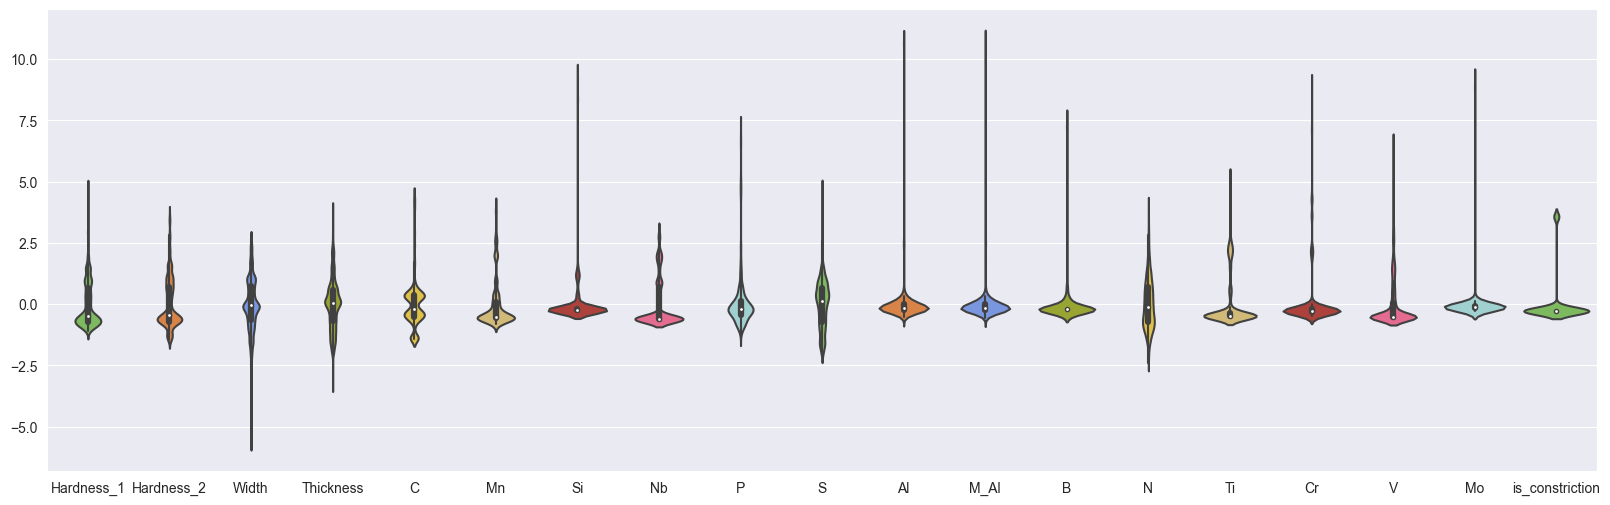

In [18]:
colors_list = ['#78C850', '#F08030',  '#6890F0',  '#A8B820',  '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
plt.figure(figsize=(20,6))
sns.set_palette("RdBu")
sns.set_style("darkgrid")
sns.violinplot(data=normalized_df,palette=colors_list, alpha=0.8)

In [23]:
print('unique_values:',df['is_constriction'].unique())
print('count_values:',df['is_constriction'].value_counts())

unique_values: [0 1]
count_values: 0    9273
1     727
Name: is_constriction, dtype: int64


In [19]:
normalized_df.keys()

Index(['Hardness_1', 'Hardness_2', 'Width', 'Thickness', 'C', 'Mn', 'Si', 'Nb',
       'P', 'S', 'Al', 'M_Al', 'B', 'N', 'Ti', 'Cr', 'V', 'Mo',
       'is_constriction'],
      dtype='object')

In [21]:
print(normalized_df['is_constriction'].unique())
print(normalized_df['is_constriction'].value_counts())

[-0.27998538  3.57125786]
-0.279985    9273
 3.571258     727
Name: is_constriction, dtype: int64


<AxesSubplot: xlabel='is_constriction', ylabel='Width'>

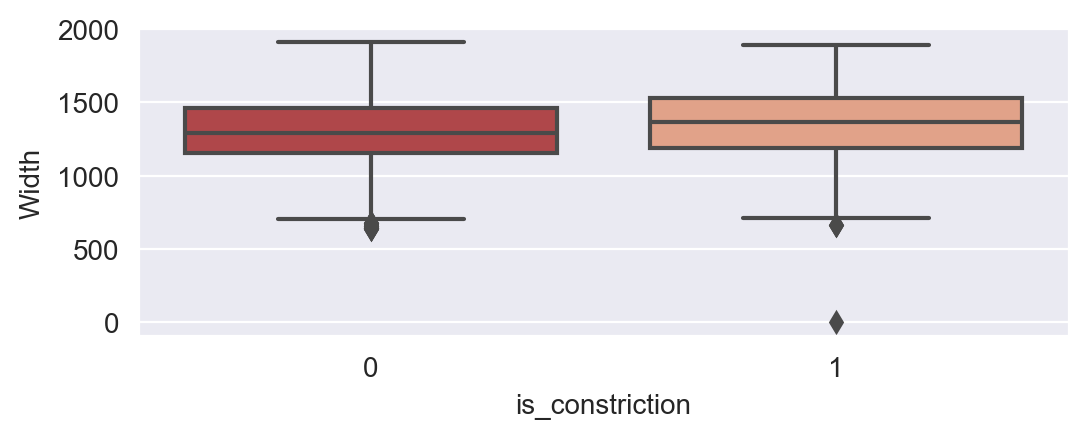

In [82]:
plt.figure(figsize=(6,2),dpi=200)
sns.boxplot(data=df,x='is_constriction',y='Width')

<AxesSubplot: xlabel='is_constriction', ylabel='Width'>

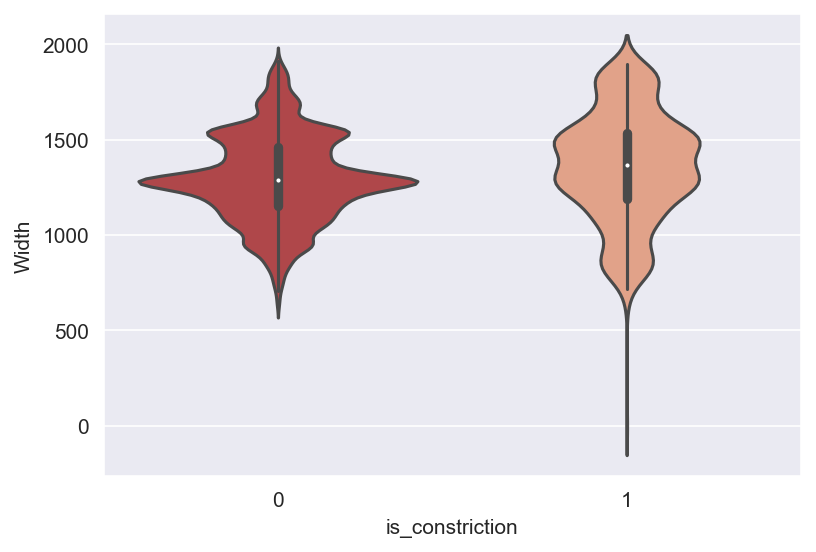

In [25]:
plt.figure(figsize=(6,4),dpi=150)
sns.violinplot(data=df,x='is_constriction',y='Width')

<AxesSubplot: xlabel='is_constriction', ylabel='Thickness'>

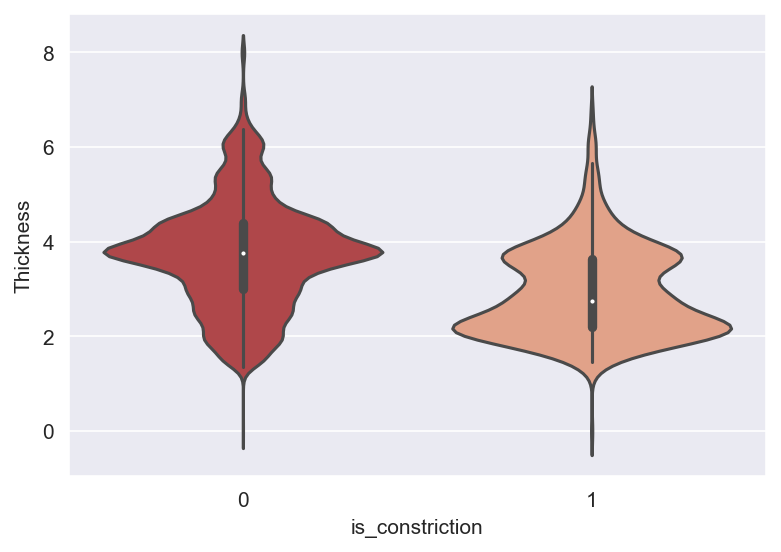

In [26]:
plt.figure(figsize=(6,4),dpi=150)
sns.violinplot(data=df,x='is_constriction',y='Thickness')

In [ ]:
# def outliers(df,ft):
#     Q1=df[ft].quantile(0.25)
#     Q3=df[ft].quantile(0.75)
#     IQR = Q3-Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 - 1.5 * IQR

#     ls = df.index[(df[ft] < lower_bound) |(df[ft] > upper_bound)]
#     return ls

In [ ]:
# index_list=[]
# for feature in normalized_df:
#        index_list.extend(outliers(normalized_df,feature))

In [ ]:
#index_list